# Heart Attack Analysis 

#### we have data on patients seen by a cardoligists.The main goal of this model is to build the machine learning model,that will be able to predict the risk of heart attacks based on patients health condition.

#### here we have the decription of the features

#### 1. age - age in years
#### 2. sex - 0 is female, 1 is male
#### 3. cp - chest pain type( 1= typical angina, 2= atypical angina,3= non-anginal pain; 0= asymptomatic)
#### 4. trtbs - resting blood pressure(in mm Hg on admission to the hospital)
#### 5. chol - serum cholestral in mg/dl
#### 6. fbs - fasting blood sugar > 120 mg/dl (0 false, 1 true)
#### 7. restecg - resting electrocardiographic results( 0 = normal, 1 = hypertrophy, 2 = having ST/CV wave abnormality)
#### 8. thalachh -  maximum heart rate achieved
#### 9. exng - exercise induced angina (0 = no, 1 = yes)
#### 10. oldpeak - ST depression induced by exercise relative to rest
#### 11. slp - slope of the peak exercise ST segment (0 = downlosping, 1= flat , 2 = upsloping)
#### 12. caa - no of major vessels(0-4) colored by flourosopy
#### 13. thall - thallium stress test( 1 = fixed defect, 2 = reversible effect,3 = normal)
#### 14 output - 0 is less chance of heart attacks, 1 is more chance of heart attack

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from scipy.stats import loguniform
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix


In [3]:
df=pd.read_csv("D:\\Likitha H R\\heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df.fillna(method='ffill', inplace=True)

#### 1.This data set includes information about 303 patients.
#### 2. There are 13 columns.Even though 12 of them integer type, only 5 columns are numeric columns and rest of them are categorical data. 
#### 3.The target is output, 0 is the low risk patient while 1 is the high risk patient.

# Exploratory Data Analysis 

## Age

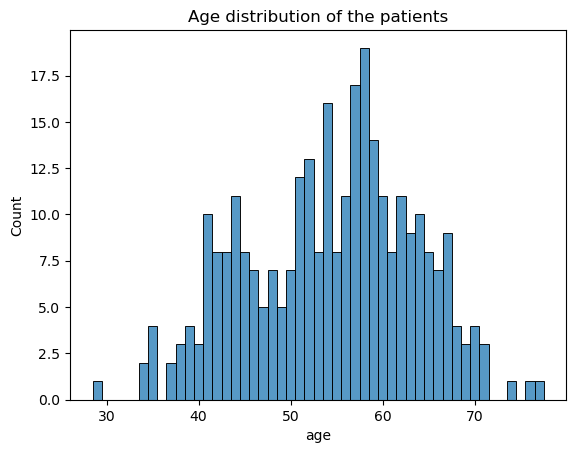

In [7]:
sns.histplot(df.age, discrete=True)
plt.title('Age distribution of the patients')
plt.show()

#### The dataset contains the information of the older patients, which is to be expected. The majority of the patients that are older than 40. The distribution tends to be a normal distribution. The peak is at 56-58 year old. 

In [8]:
df.sex.value_counts().to_frame()

,sex
1,207
0,96


#### As we can see there are more no of male patients than female

## Chest Pain

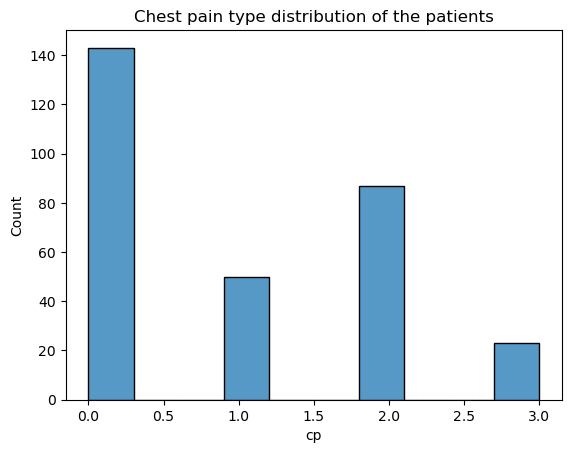

In [9]:
sns.histplot(df.cp)
plt.title('Chest pain type distribution of the patients')
plt.show()

#### Almost half of the patients have no chest pain 

## Resting Blood Pressure

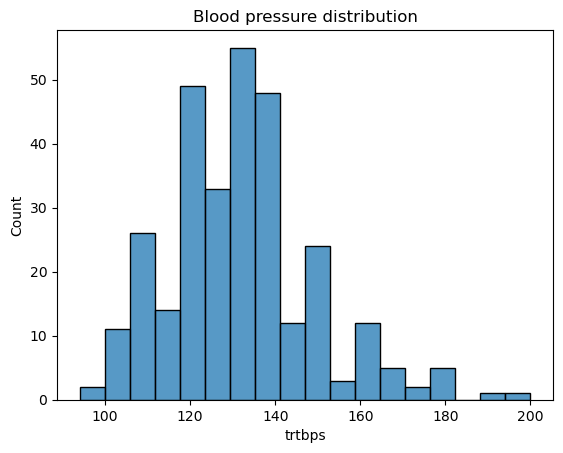

In [10]:
sns.histplot(df.trtbps)
plt.title('Blood pressure distribution')
plt.show()

## Cholestral

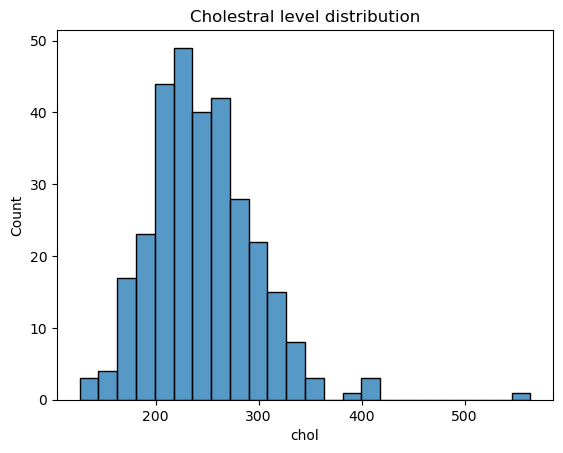

In [11]:
sns.histplot(df.chol)
plt.title('Cholestral level distribution')
plt.show()

#### The distribution has the normal shape, but it is skewed towards right because of the outliers. Some patients have extremely high level of cholestral

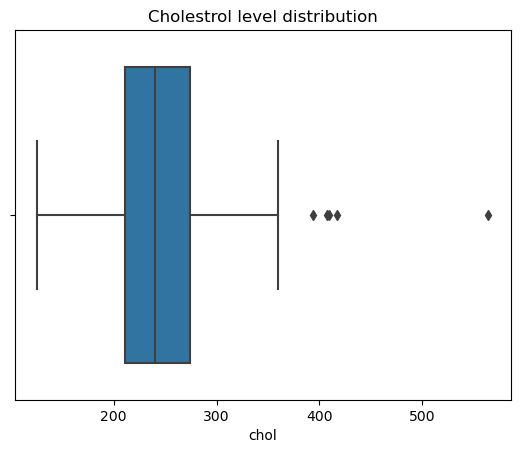

In [12]:
sns.boxplot(data=df, x='chol')
plt.title('Cholestrol level distribution')
plt.show()

#### The cholestrol level is higher as you can see the outliers are present, but we cannot remove those outliers because the data is realistic.

## Fasting Blood Sugar

#### 0 - less than or equal to 120 mg/dl, 1 - higher than 120mg/dl

In [13]:
df.fbs.value_counts().to_frame()

,fbs
0,258
1,45


#### The majority of the patients doesnt have a serious sugar problem

# Resting Electro Cardiographic results

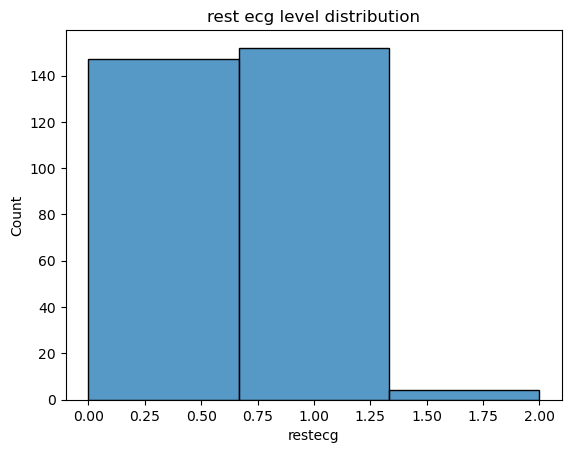

In [14]:
sns.histplot(df.restecg,bins=3)
plt.title('rest ecg level distribution')
plt.show()

#### About 50% of the patients have hypertrophy, Only a few of the patients have ST/CV wave abnormality, rest of them are normal

## Maximun Heart Rate achieved

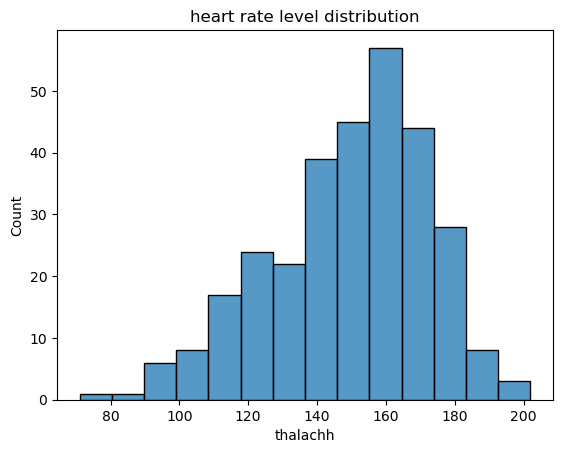

In [15]:
sns.histplot(df.thalachh)
plt.title('heart rate level distribution')
plt.show()

#### The distribution looks similar to the normal distribution, which is skewed towards left

## Exercise-Induced Angina

In [16]:
df.exng.value_counts().to_frame()

,exng
0,204
1,99


#### 99 patients suffer from excercise induced angina

##  ST depression induced by exercise relative to rest

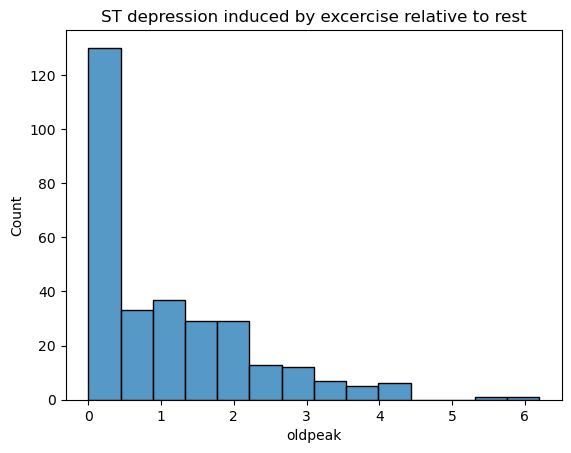

In [17]:
sns.histplot(df.oldpeak)
plt.title('ST depression induced by excercise relative to rest')
plt.show()

## slope of the peak exercise ST segment

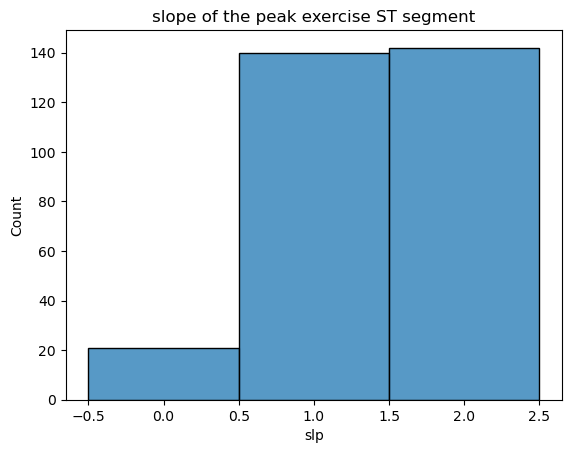

In [18]:
sns.histplot(df.slp,discrete= True)
plt.title('slope of the peak exercise ST segment')
plt.show()

## Number of major vessels

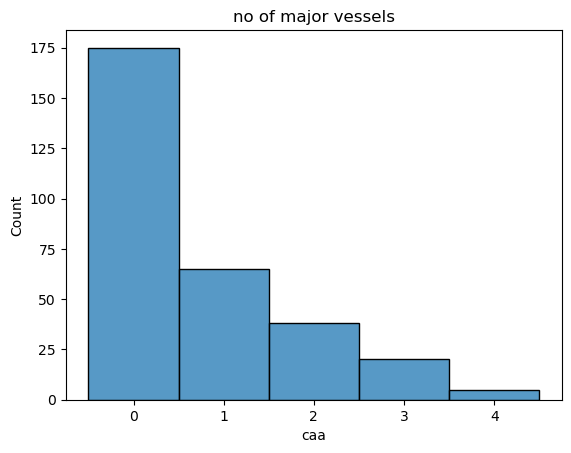

In [19]:
sns.histplot(df.caa,discrete=True)
plt.title('no of major vessels')
plt.show()

## Thallium Stress Test

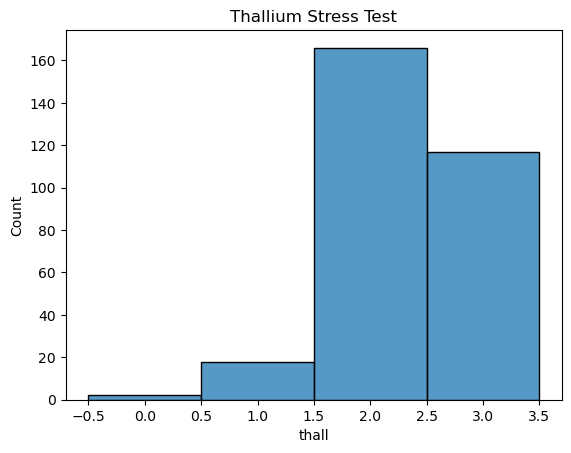

In [20]:
sns.histplot(df.thall,discrete=True)
plt.title('Thallium Stress Test')
plt.show()

In [21]:
df.output.value_counts().to_frame()

,output
1,165
0,138


In [22]:
df.output.value_counts(normalize=True).to_frame()

,output
1,0.544554
0,0.455446


#### 54.5% of patients have high risk of heart attacks, where as 45.5% of patients have low risk of heart attacks

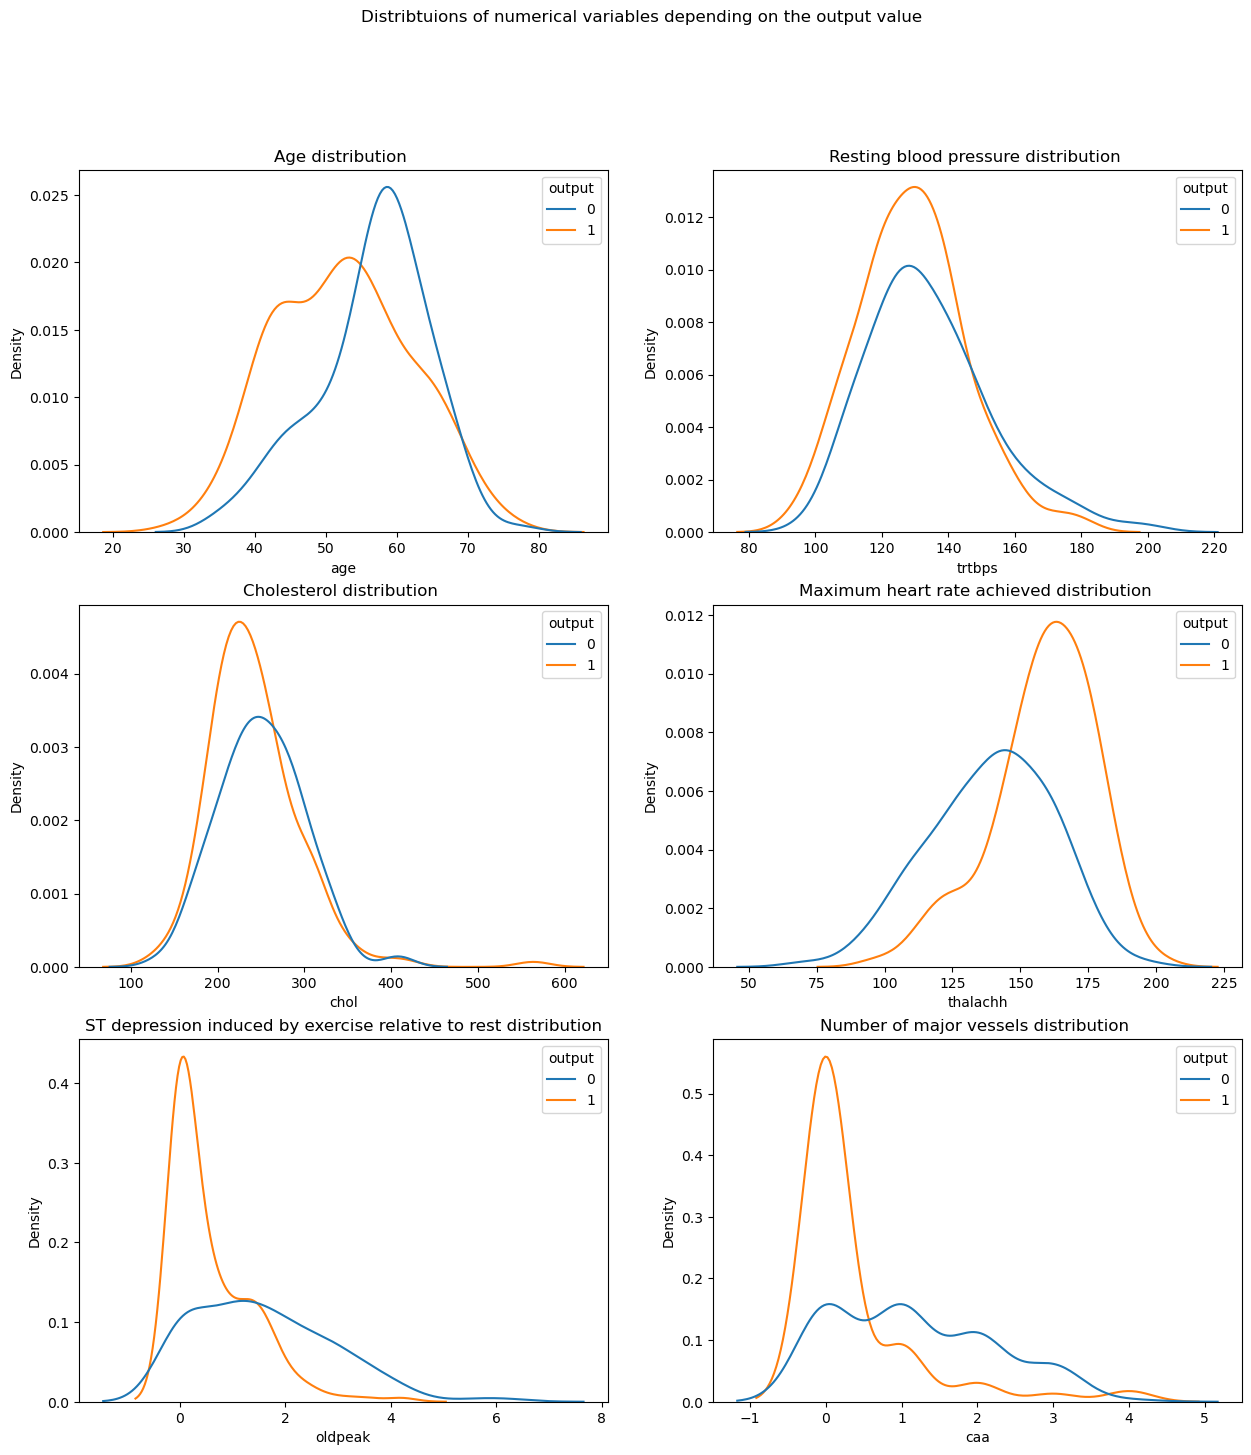

In [23]:
_, axes = plt.subplots(3, 2, figsize=(15,16))
sns.kdeplot(data=df, x='age', hue='output', ax=axes[0, 0])
axes[0, 0].set_title('Age distribution ')
sns.kdeplot(data=df, x='trtbps', hue='output', ax=axes[0, 1])
axes[0, 1].set_title('Resting blood pressure distribution ')
sns.kdeplot(data=df, x='chol', hue='output', ax=axes[1, 0])
axes[1, 0].set_title('Cholesterol distribution ')
sns.kdeplot(data=df, x='thalachh', hue='output', ax=axes[1, 1])
axes[1, 1].set_title('Maximum heart rate achieved distribution ')  
sns.kdeplot(data=df, x='oldpeak', hue='output', ax=axes[2, 0])
axes[2, 0].set_title('ST depression induced by exercise relative to rest distribution')
sns.kdeplot(data=df, x='caa', hue='output', ax=axes[2, 1])
axes[2, 1].set_title('Number of major vessels distribution ')
plt.suptitle('Distribtuions of numerical variables depending on the output value')
plt.show()

#### From the distribution, it can be observed that blood pressure and cholestrol level does not affect the chance of heart attack
#### Another interesting observation is that relatively younger people are more prone to have a heart attack.
#### Maximum heart rate achieved, ST depression induced by exercise relative to test, and number of vessels have an influence on the output

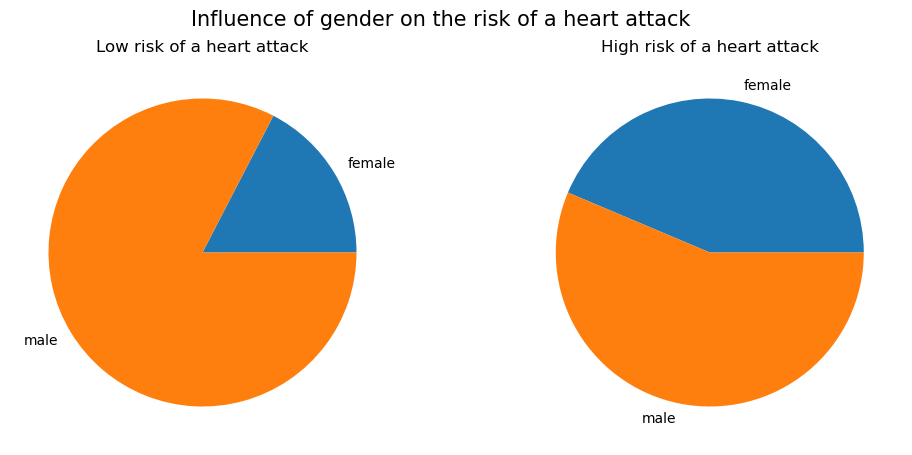

In [24]:
_, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].pie(df.query('output == 0').groupby('sex')['sex'].count(), labels=['female', 'male'])
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('sex')['sex'].count(), labels=['female', 'male'])
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of gender on the risk of a heart attack', fontsize=15)
plt.show()

In [25]:
df.groupby('output', as_index=False)['sex'].mean()

,output,sex
0,0,0.826087
1,1,0.563636


#### As we can see females are more prone to have heart diseases as it subjects to 82% and the males are of 56%

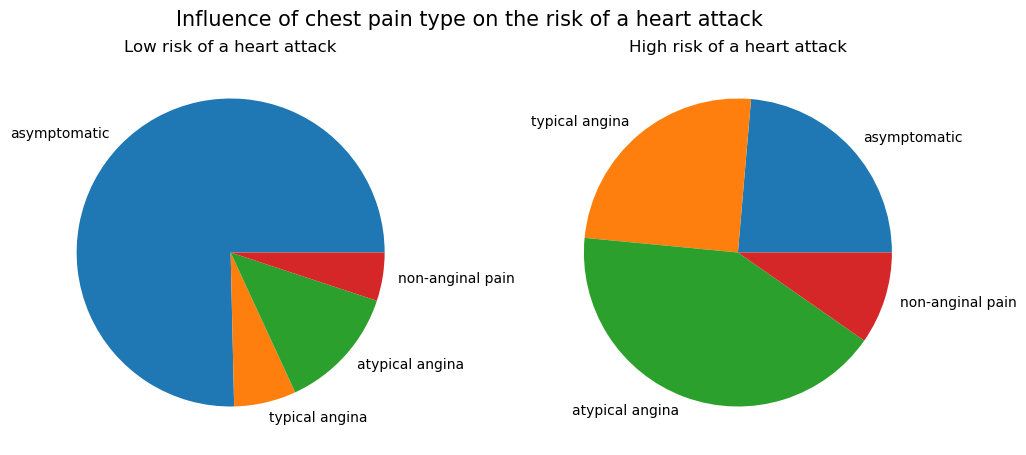

In [26]:
_, axes = plt.subplots(1, 2, figsize=(12,5)) 

labels = ['asymptomatic', 'typical angina', 'atypical angina', 'non-anginal pain']

axes[0].pie(df.query('output == 0').groupby('cp')['cp'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('cp')['cp'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of chest pain type on the risk of a heart attack', fontsize=15)
plt.show()

#### From this chart we can conclude that any type of chest pain needs to taken into consideration as it may higher the risk of getting heart attacks

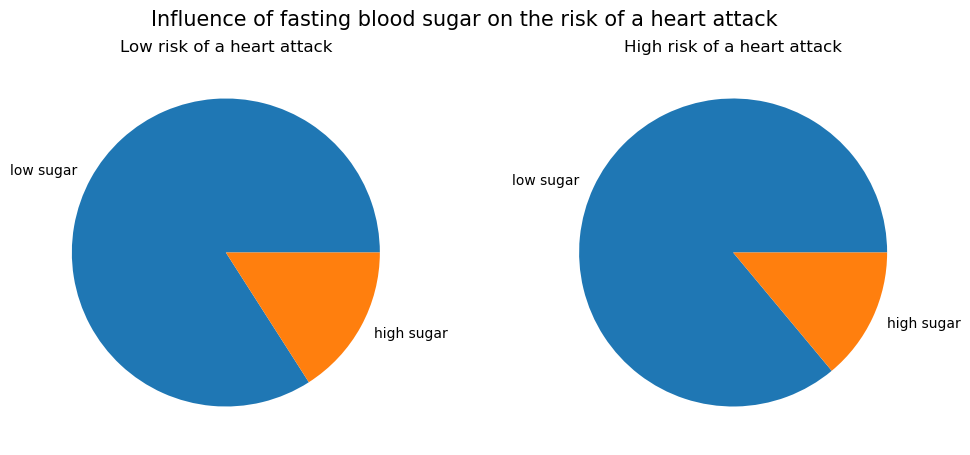

In [27]:
_, axes = plt.subplots(1, 2, figsize=(12,5))
labels = ['low sugar', 'high sugar']

axes[0].pie(df.query('output == 0').groupby('fbs')['fbs'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('fbs')['fbs'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of fasting blood sugar on the risk of a heart attack', fontsize=15)
plt.show()

#### Fasting Blood sugar does not affect the output

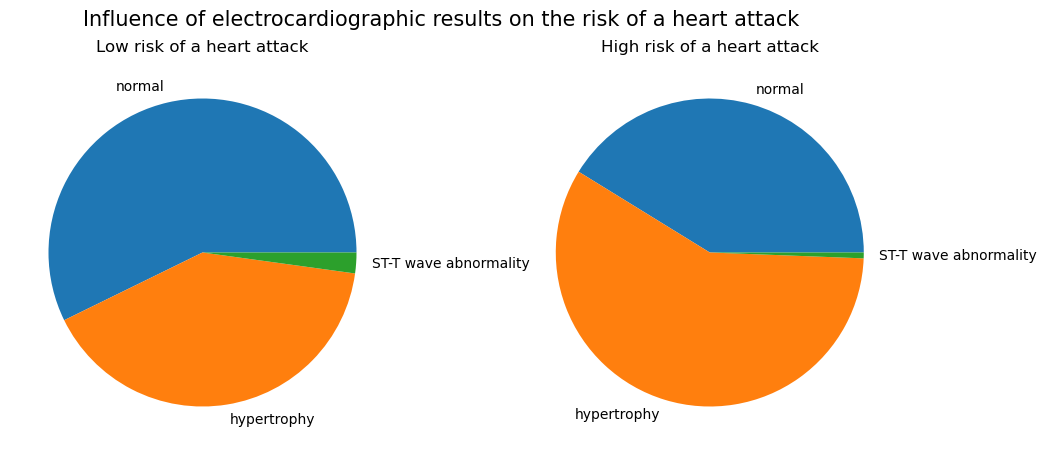

In [28]:
_, axes = plt.subplots(1, 2, figsize=(12,5)) 

labels = ['normal', 'hypertrophy', 'ST-T wave abnormality']

axes[0].pie(df.query('output == 0').groupby('restecg')['restecg'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('restecg')['restecg'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of electrocardiographic results on the risk of a heart attack', fontsize=15)
plt.show()

### People with high hypertrophy are more prone to have heart attacks 

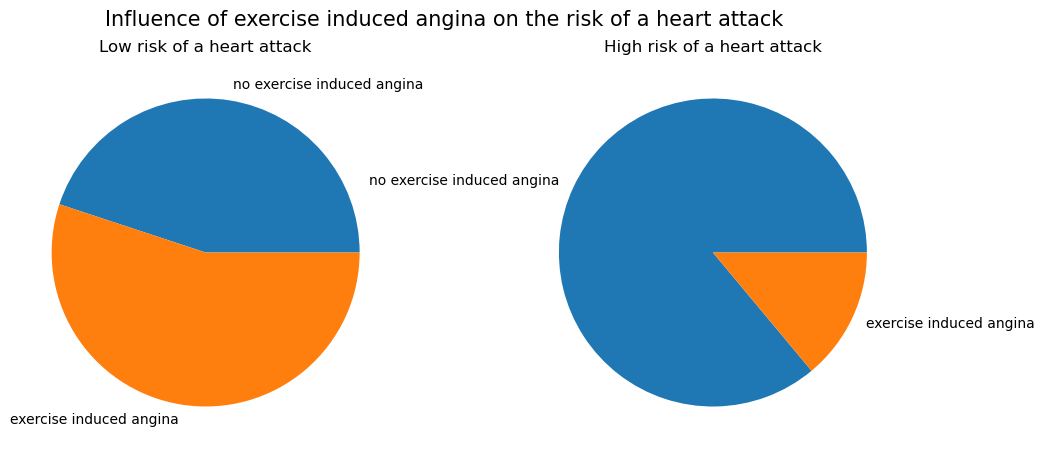

In [29]:
_, axes = plt.subplots(1, 2, figsize=(12,5))
labels = ['no exercise induced angina', 'exercise induced angina']

axes[0].pie(df.query('output == 0').groupby('exng')['exng'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('exng')['exng'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of exercise induced angina on the risk of a heart attack', fontsize=15)
plt.show()

### High risk patients have less exercise induced angina than compared to low risk patients

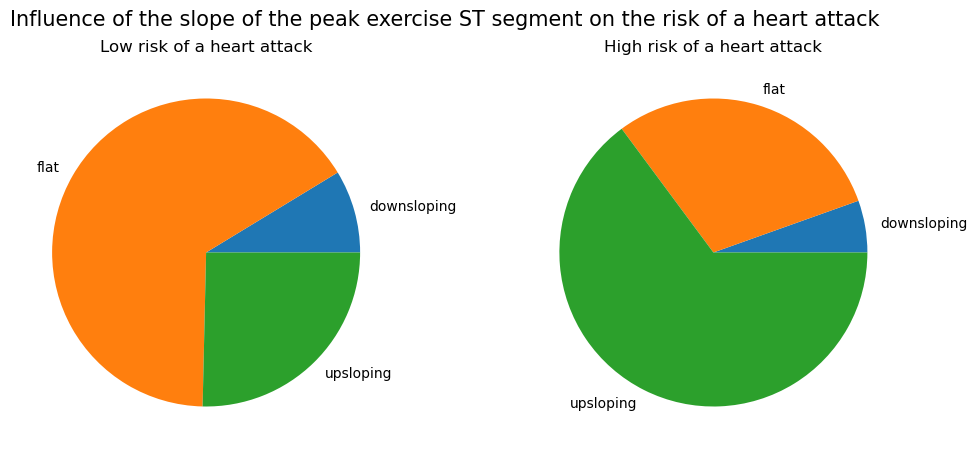

In [30]:
_, axes = plt.subplots(1, 2, figsize=(12,5))
labels = ['downsloping', 'flat', 'upsloping']

axes[0].pie(df.query('output == 0').groupby('slp')['slp'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('slp')['slp'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of the slope of the peak exercise ST segment on the risk of a heart attack', fontsize=15)
plt.show()

### Patients with upslope have higher chance of heart attack 

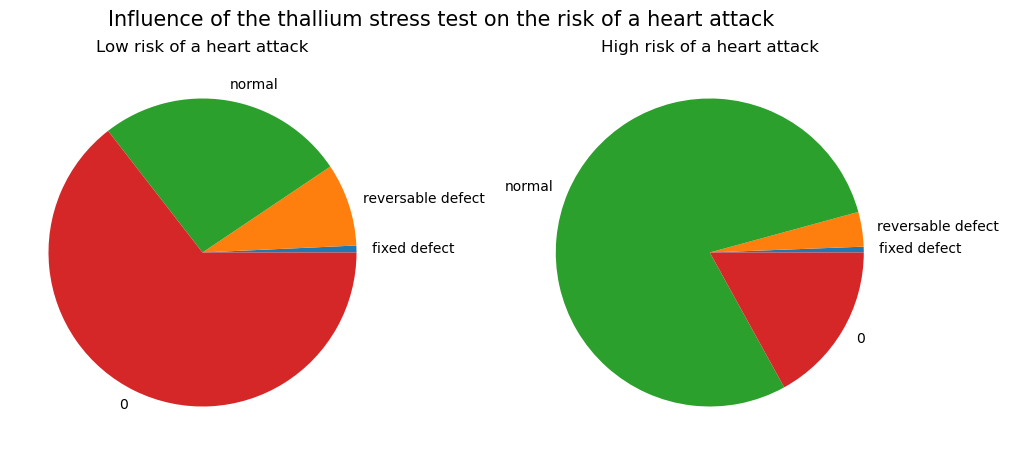

In [31]:
_, axes = plt.subplots(1, 2, figsize=(12,5))
labels = ['fixed defect', 'reversable defect', 'normal','0']

axes[0].pie(df.query('output == 0').groupby('thall')['thall'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('thall')['thall'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of the thallium stress test on the risk of a heart attack', fontsize=15)
plt.show()

### People with normal result are less prone to have heart attack

In [32]:
df['thall'] = df['thall'].map({3 : 0, 1 : 2, 2 : 1})

####  Now we have the following labels 

#### 0 = Normal
#### 1 = reversable defect
#### 2 = fixed defect

In [33]:
df.query('cp == 0 and restecg == 0 and exng == 0 and thall == 0')['output'].value_counts()

0    13
Name: output, dtype: int64

####  All of them are out of risk group

### we are trying to add the categorical features where output will be 0 or 1 

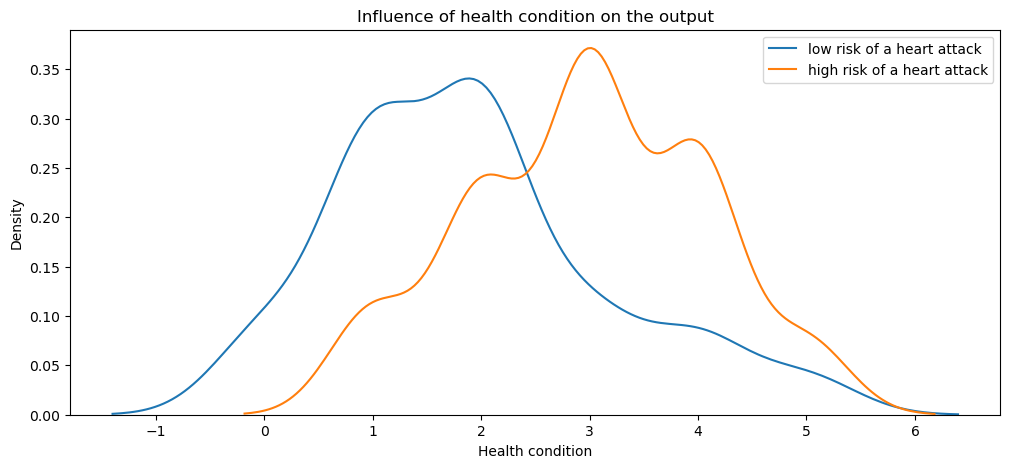

In [34]:
plt.figure(figsize=(12,5))
df_0 = df.query('output == 0')
df_1 = df.query('output == 1')
sns.kdeplot(df_0.cp + df_0.restecg + df_0.exng + df_0.thall, label='low risk of a heart attack')
sns.kdeplot(df_1.cp + df_1.restecg + df_1.exng + df_1.thall, label='high risk of a heart attack')
plt.title('Influence of health condition on the output')
plt.xlabel('Health condition')
plt.legend()
plt.show()

### The people with good health condition have low chance of heart attack

##  Conclusion 

#### The majority of patients are older than 40.
#### In the dataset there a two times male than female.
#### 54.5% have high risk of heart attack, 45.5% have low risk of heart attack. The classes are relatively balanced.
#### The following numerical features affect the output - age,minimum heart rate achieved, ST depression induced by excercise relative to rest distribution and the no of major vessels.
#### All the categorical feature except fasting blood sugar affect the output.
#### Age distributions of patients from high risk group has a peak at 50-52 ages
#### Women are more prone to have heart attack than men.
#### Patients that have normal analysis results(such as electrocardiography and thallium stress test) are less likely to have heart attack.

# Feature Engineeering 

#### In this paragraph, based on carried out EDA, we will try to build new features that can help us to predict the output 

In [35]:
df_n = df.copy()

# Removing Features 

#### Let's start with removing useless features. From the previous section, we assume that blood pressure, cholesterol and blood sugar have no influence on a heart attack. To check we'll use attribute *feature_importnaces_* from RandomForestClassifier.

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
df.fillna(method='ffill', inplace=True)
rf_classifier = RandomForestClassifier(max_depth=8,
                                       n_estimators=100,
                                       random_state=42)
rf_classifier.fit(df.drop('output', axis=1), df['output'])

RandomForestClassifier(max_depth=8, random_state=42)

In [38]:
importance = pd.concat([pd.Series(df.columns[:-1]), 
                        pd.Series(rf_classifier.feature_importances_)], axis=1)
importance.columns = ['feature', 'importance']
importance = importance.sort_values(by = 'importance', ascending= False)
importance

,feature,importance
2,cp,0.144087
7,thalachh,0.124776
12,thall,0.111340
11,caa,0.109054
9,oldpeak,0.108155
0,age,0.078449
4,chol,0.074956
3,trtbps,0.072395
8,exng,0.060181
10,slp,0.052042


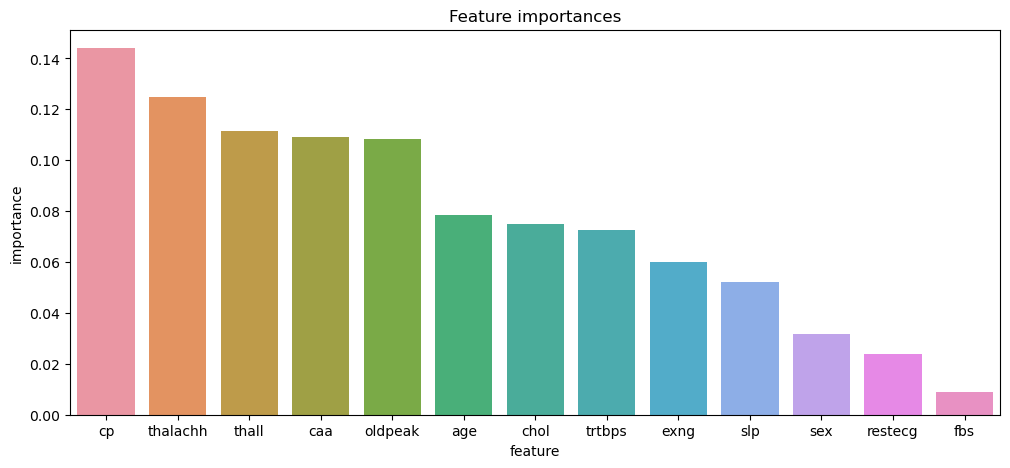

In [39]:
plt.figure(figsize=(12,5))
sns.barplot(data=importance, x='feature', y='importance')
plt.title('Feature importances')
plt.show()

#### Our assumptions of blood sugar was confirmed.Let's remove the feature 

In [40]:
df_n = df_n.drop('fbs',axis=1)

#### Features *sex* and *restecg* have low importance, but during the EDA we could observe the opposite situation. Let's keep them in the dataframe.

# Adding new features

### The feature, that has an influence on the output, is the maximum heart rate achieved. In medical practice it's calculated using the following equation:

### $$ MHR = 208 - (0.7 \times age)$$

### We can use it as a new feature.

In [41]:
df_n['MHR estimation'] = 208-(0.7 * df_n['age'])

#### As it was discussed before, we can make a new categorical feature from blood pressure using the following label system:
#### - pressure < 120 = 0 (normal)
#### - 120 <= pressure < 140 = 1 (elevated)
#### - 140 <= pressure = 2 (high)

In [42]:
df_n['blood pressure'] = df_n['trtbps'].apply (lambda x:0 if x < 120 else(1 if x < 140 else 2))

In [43]:
df_n['blood pressure'].value_counts().to_frame()

,blood pressure
1,146
2,97
0,60


#### The same idea can be applied to the cholesterol level:
#### - cholesterol < 200 = 0 (desirable)
#### - 200 <= cholesterol < 240 = 1 (borderline)
#### - 240 <= cholesterol = 2 (high)

In [44]:
df_n['cholestrol']= df_n['chol'].apply(lambda x : 0 if x < 200 else ( 1 if x < 240 else 2))

In [45]:
df_n['cholestrol'].value_counts().to_frame()

,cholestrol
2,155
1,98
0,50


In [46]:
df_n['press_chol'] = df_n['blood pressure'] + df_n['cholestrol']

In [47]:
df_n['press_chol'].value_counts().to_frame()

,press_chol
3,109
2,84
4,52
1,45
0,13


In [48]:
df_n['cat_columns']= df_n['cp'] + df_n['restecg'] + df_n['thall'] + df_n['exng']

In [49]:
cat_columns=['cat_columns']

In [50]:
df_n['cat_columns'].value_counts().to_frame()

,cat_columns
2.0,84
3.0,72
1.0,60
4.0,54
5.0,18
0.0,13


### **Eventually, 1 feature was removed, 5 features were added**

In [51]:
len(df_n.columns)- len(df.columns)

4

In [52]:
df_n.head()

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,MHR estimation,blood pressure,cholestrol,press_chol,cat_columns
0,63,1,3,145,233,0,150,0,2.3,0,0,2.0,1,163.9,2,1,3,5.0
1,37,1,2,130,250,1,187,0,3.5,0,0,1.0,1,182.1,1,2,3,4.0
2,41,0,1,130,204,0,172,0,1.4,2,0,1.0,1,179.3,1,1,2,2.0
3,56,1,1,120,236,1,178,0,0.8,2,0,1.0,1,168.8,1,1,2,3.0
4,57,0,0,120,354,1,163,1,0.6,2,0,1.0,1,168.1,1,2,3,3.0


## Assessment of changes

### Now we can compare the performance of two features sets on the simple model using cross-validation.

In [53]:
from sklearn.model_selection import cross_val_score
cross_val_score(
    estimator=RandomForestClassifier(max_depth=8,
                                     n_estimators=100,
                                     random_state=42),
    X=df.drop('output', axis=1),
    y=df['output'],
    scoring='f1',
    cv=5
).mean()

0.8364604317333733

In [54]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df_n.drop('output', axis=1))

# Now perform cross-validation
cross_val_score(
    estimator=RandomForestClassifier(max_depth=8,
                                     n_estimators=100,
                                     random_state=42),
    X=X_imputed,
    y=df_n['output'],
    scoring='f1',
    cv=5
).mean()

0.8495959529569408

### The performance of the new model with modified features is better.

## Conclusion

1. Feature *fbs* (fasting blood sugar) was removed.
2. One new numerical feature was added - estimated maximum heart rate achieved.
3. 4 new categorical features were added.

## Data Preparation 

 Since there is no missing values in the data, the preparation is simple

### Let's seperate the numerical and categorical features

In [55]:
num_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa', 'MHR estimation']
cat_features = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall', 'blood pressure', 'cholestrol', 'press_chol', 'cat_columns']

## Dividing the data between dependent and independent features

In [56]:
feature = df_n.drop('output', axis=1)
target = df_n['output']

In [57]:
print(feature.shape)
print(target.shape)

(303, 17)
(303,)


## Preparation for CatBoost

CatBoost is one of the most efficient gradient boosting libraries. 
According to the library documentation, it's not recommended to do data preparation beforehand (especially for categorical features, because CatBoost has its own built-in mechanisms to handle categorical features). Feature scaling also will be omitted. One thing we have to do is splitting the dataset.

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42) 

In [59]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 17)
(61, 17)
(242,)
(61,)


In [60]:
x_train

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,MHR estimation,blood pressure,cholestrol,press_chol,cat_columns
132,42,1,1,120,295,1,162,0,0.0,2,0,1.0,178.6,1,2,3,3.0
202,58,1,0,150,270,0,111,1,0.8,2,0,0.0,167.4,2,2,4,1.0
196,46,1,2,150,231,1,147,0,3.6,1,0,1.0,175.8,2,1,3,4.0
75,55,0,1,135,250,0,161,0,1.4,1,0,1.0,169.5,1,2,3,2.0
176,60,1,0,117,230,1,160,1,1.4,2,2,0.0,166.0,0,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,1,163,0,0.6,1,1,0.0,173.0,2,1,3,3.0
71,51,1,2,94,227,1,154,1,0.0,2,1,0.0,172.3,0,1,1,4.0
106,69,1,3,160,234,0,131,0,0.1,1,1,1.0,159.7,2,1,3,4.0
270,46,1,0,120,249,0,144,0,0.8,2,0,0.0,175.8,1,2,3,0.0


### To avoid any conflicts in the future we have to transform our categorical features to string type.

In [61]:
x_train[cat_features] = x_train[cat_features].astype('str')
x_test[cat_features] = x_test[cat_features].astype('str')

In [62]:
x_train.head()

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,MHR estimation,blood pressure,cholestrol,press_chol,cat_columns
132,42,1,1,120,295,1,162,0,0.0,2,0,1.0,178.6,1,2,3,3.0
202,58,1,0,150,270,0,111,1,0.8,2,0,0.0,167.4,2,2,4,1.0
196,46,1,2,150,231,1,147,0,3.6,1,0,1.0,175.8,2,1,3,4.0
75,55,0,1,135,250,0,161,0,1.4,1,0,1.0,169.5,1,2,3,2.0
176,60,1,0,117,230,1,160,1,1.4,2,2,0.0,166.0,0,1,1,2.0


In [63]:
x_test.head()

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,MHR estimation,blood pressure,cholestrol,press_chol,cat_columns
179,57,1,0,150,276,0,112,1,0.6,1,1,2.0,168.1,2,2,4,3.0
228,59,1,3,170,288,0,159,0,0.2,1,0,0.0,166.7,2,2,4,3.0
111,57,1,2,150,126,1,173,0,0.2,2,1,0.0,168.1,2,0,2,3.0
246,56,0,0,134,409,0,150,1,1.9,1,2,0.0,168.8,1,2,3,1.0
60,71,0,2,110,265,0,130,0,0.0,2,1,1.0,158.3,0,2,2,3.0


## Encoding Categorical data

in the data set, all the categorical variables have been encoded by label encoding, now we are applying the one hot encoding on the feature 

In [64]:
features_one = pd.get_dummies(feature, drop_first=True, columns=cat_features)

In [65]:
features_one.head()

,age,trtbps,chol,thalachh,oldpeak,caa,MHR estimation,sex_1,cp_1,cp_2,...,cholestrol_2,press_chol_1,press_chol_2,press_chol_3,press_chol_4,cat_columns_1.0,cat_columns_2.0,cat_columns_3.0,cat_columns_4.0,cat_columns_5.0
0,63,145,233,150,2.3,0,163.9,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,37,130,250,187,3.5,0,182.1,1,0,1,...,1,0,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,0,179.3,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,56,120,236,178,0.8,0,168.8,1,1,0,...,0,0,1,0,0,0,0,1,0,0
4,57,120,354,163,0.6,0,168.1,0,0,0,...,1,0,0,1,0,0,0,1,0,0


## Train Test Split

In [66]:
feature_train, feature_test, target_train, target_test = train_test_split(features_one, 
                                                                            target, 
                                                                            test_size=0.2,
                                                                            random_state=42)

In [67]:
print(feature_train.shape)
print(feature_test.shape)
print(target_train.shape)
print(target_test.shape)

(242, 31)
(61, 31)
(242,)
(61,)


# Standardization

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_train[num_features] = scaler.fit_transform(feature_train[num_features])
feature_test[num_features] = scaler.transform(feature_test[num_features])

In [69]:
feature_train.head()

,age,trtbps,chol,thalachh,oldpeak,caa,MHR estimation,sex_1,cp_1,cp_2,...,cholestrol_2,press_chol_1,press_chol_2,press_chol_3,press_chol_4,cat_columns_1.0,cat_columns_2.0,cat_columns_3.0,cat_columns_4.0,cat_columns_5.0
132,-1.356798,-0.616856,0.914034,0.532781,-0.920864,-0.689701,1.356798,1,1,0,...,1,0,0,1,0,0,0,1,0,0
202,0.385086,1.169491,0.439527,-1.753582,-0.193787,-0.689701,-0.385086,1,0,0,...,1,0,0,0,1,1,0,0,0,0
196,-0.921327,1.169491,-0.300704,-0.139679,2.350982,-0.689701,0.921327,1,0,1,...,0,0,0,1,0,0,0,0,1,0
75,0.058483,0.276318,0.059921,0.487950,0.351521,-0.689701,-0.058483,0,1,0,...,1,0,0,1,0,0,1,0,0,0
176,0.602822,-0.795490,-0.319684,0.443119,0.351521,1.333421,-0.602822,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [70]:
feature_test.head()

,age,trtbps,chol,thalachh,oldpeak,caa,MHR estimation,sex_1,cp_1,cp_2,...,cholestrol_2,press_chol_1,press_chol_2,press_chol_3,press_chol_4,cat_columns_1.0,cat_columns_2.0,cat_columns_3.0,cat_columns_4.0,cat_columns_5.0
179,0.276218,1.169491,0.553408,-1.708752,-0.375556,0.321860,-0.276218,1,0,0,...,1,0,0,0,1,0,0,1,0,0
228,0.493954,2.360389,0.781172,0.398289,-0.739095,-0.689701,-0.493954,1,0,0,...,1,0,0,0,1,0,0,1,0,0
111,0.276218,1.169491,-2.293633,1.025918,-0.739095,0.321860,-0.276218,1,0,1,...,0,0,1,0,0,0,0,1,0,0
246,0.167350,0.216773,3.077785,-0.005187,0.805944,1.333421,-0.167350,0,0,0,...,1,0,0,1,0,1,0,0,0,0
60,1.800367,-1.212304,0.344625,-0.901800,-0.920864,0.321860,-1.800367,0,0,1,...,1,0,1,0,0,0,0,1,0,0


Data preparation is completed

# Modelling 

In this section, we will learn several models and we will compare their performances using cross_validation. For hyperparameter tuning RandomizedsearchCV will be used .As target, metricwe willluse f1 score.

# SVM

For support vector machine classifier three parameters will be tuned C,Kernal,gamma

In [71]:
from scipy.stats import uniform
from scipy.stats import loguniform
from sklearn.svm import SVC
parameters_svc = dict(
    C=loguniform(0.0001, 20),
    kernel=['rbf', 'poly'],
    gamma=loguniform(0.0001, 20)
)

In [72]:

%%time
random_search_svc = RandomizedSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_distributions=parameters_svc,
    n_iter=75,
    scoring='f1',
    cv=5,
    random_state=42
)
random_search_svc.fit(feature_train, target_train)

CPU times: total: 4.8 s
Wall time: 6.01 s


RandomizedSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
                   n_iter=75,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000013808490340>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001380839A080>,
                                        'kernel': ['rbf', 'poly']},
                   random_state=42, scoring='f1')

## Lets have the look at the best score and best performance 

In [73]:
svc_cv_f1 = random_search_svc.best_score_
svc_cv_f1

0.8356354836935598

In [74]:
random_search_svc.best_params_

{'C': 6.413938177632789, 'gamma': 0.002770647125382976, 'kernel': 'rbf'}

In [75]:
best_svc = random_search_svc.best_estimator_

# Random Forest 

5 parameters will be tuned for the Random Forest 

In [76]:
parameters_rf = dict(
    n_estimators=range(5, 1000),
    max_depth=range(4, 30),
    min_samples_split=range(2, 10),
    min_samples_leaf=range(1, 10),
    max_features=range(2, feature_train.shape[1])
)

In [77]:
%%time
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=parameters_rf,
    n_iter=75,
    scoring='f1',
    cv=5,
    random_state=42,
    verbose=1
)
random_search_rf.fit(feature_train, target_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
CPU times: total: 3min 50s
Wall time: 4min 44s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=75,
                   param_distributions={'max_depth': range(4, 30),
                                        'max_features': range(2, 31),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': range(5, 1000)},
                   random_state=42, scoring='f1', verbose=1)

#### Lets have a look at the best score and the best parameters

In [78]:
rf_cv_f1 = random_search_rf.best_score_
rf_cv_f1

0.8514879031568089

In [79]:
random_search_rf.best_params_

{'n_estimators': 925,
 'min_samples_split': 9,
 'min_samples_leaf': 3,
 'max_features': 9,
 'max_depth': 14}

In [80]:
best_rf = random_search_rf.best_estimator_

# Cat Boost

As we discussed before, CatBoost will be trained on the unprepared data. 5 parameters will be tuned: learning rate (the higher - the bigger the step of the gradient descent), iterations,  depth, l2_leaf_reg (regularization parameter), random_strength (a parameter that adds random to the model).

In [96]:
!pip install catboost
from catboost import CatBoostClassifier

import catboost
parameters_boost=dict(
    learning_rate=loguniform(0.0001, 0.5),
    iterations=range(10, 500),
    depth=range(3, 12),
    l2_leaf_reg=uniform(1, 20),
    random_strength=loguniform(0.001, 1000)
)

In [82]:
%%time
random_search_boost = RandomizedSearchCV(
    estimator=CatBoostClassifier(verbose=False, cat_features=cat_features, eval_metric='F1'),
    param_distributions=parameters_boost,
    n_iter=25,
    scoring='f1',
    cv=5,
    random_state=42,
    verbose=1
)
random_search_boost.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
CPU times: total: 19min 32s
Wall time: 20min 48s


RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000138082B6F20>,
                   n_iter=25,
                   param_distributions={'depth': range(3, 12),
                                        'iterations': range(10, 500),
                                        'l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000013808185840>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000138082B5990>,
                                        'random_strength': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000013808B51ED0>},
                   random_state=42, scoring='f1', verbose=1)

In [83]:
catboost_cv_f1 = random_search_boost.best_score_
catboost_cv_f1

0.8560482013113593

In [84]:
random_search_boost.best_params_

{'depth': 3,
 'iterations': 57,
 'l2_leaf_reg': 8.416365043965328,
 'learning_rate': 0.029786791897162893,
 'random_strength': 9.897696661846242}

In [85]:
best_catboost = random_search_boost.best_estimator_

# comparison of the models 

Lets summarize the resukt obtained by cross-validation

In [86]:
results_cv = pd.DataFrame([
    ['svm', svc_cv_f1],
    ['random forest', rf_cv_f1],
    ['catboost', catboost_cv_f1]],
    columns=['model', 'f1-score on cross-validation']
)

In [87]:
results_cv

,model,f1-score on cross-validation
0,svm,0.835635
1,random forest,0.851488
2,catboost,0.856048


- 3 models were trained, and their hyperparameters were optimized.
- The best performance (measured with f1-score) was shown by Catboost. Random Forest has comparable results. SVM is a bit worse.

# Evaluating model performance

In this section we willl check of the performance of 3 best models on the test set 

lets make the prediction

In [88]:
svc_pred = best_svc.predict(feature_test)
rf_pred = best_rf.predict(feature_test)
catboost_pred = best_catboost.predict(x_test)

In [89]:
svc_pred_prob = best_svc.predict_proba(feature_test)[:, 1]
rf_pred_prob = best_rf.predict_proba(feature_test)[:, 1]
catboost_pred_prob = best_catboost.predict_proba(x_test)[:, 1]

# F-1 Score

lets calculate f1 score of test set

In [90]:
f1_svc_test = f1_score(target_test, svc_pred)
f1_svc_test

0.8923076923076922

In [91]:
f1_rf_test = f1_score(target_test, rf_pred)
f1_rf_test

0.8571428571428571

In [92]:
f1_catboost_test = f1_score(y_test, catboost_pred)
f1_catboost_test

0.8955223880597014

In [93]:
results_cv['f1-score on the test set'] = pd.Series([f1_svc_test, f1_rf_test, f1_catboost_test])

In [94]:
results_cv

,model,f1-score on cross-validation,f1-score on the test set
0,svm,0.835635,0.892308
1,random forest,0.851488,0.857143
2,catboost,0.856048,0.895522


- The situation slightly changed on the test set. Catboost still shows the best result, Random Forest and SVM have the same score.

# ROC Curve

 ROC-curve is another important metric to evaluate the performance of a classification model. The main advantage is that it's independent of the classification thresholds.

In [95]:
fpr_svc, tpr_svc, thresh_svc = roc_curve(target_test, svc_pred_prob)
fpr_rf, tpr_rf, thresh_rf = roc_curve(target_test, rf_pred_prob)
fpr_catboost, tpr_catboost, thresh_catboost = roc_curve(y_test, catboost_pred_prob)

C:\Users\LD\AppData\Local\Temp\ipykernel_24160\106114075.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=fpr_svc, y=tpr_svc, ci=None, label='svc')
C:\Users\LD\AppData\Local\Temp\ipykernel_24160\106114075.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=fpr_rf, y=tpr_rf, ci=None, label='random forest')
C:\Users\LD\AppData\Local\Temp\ipykernel_24160\106114075.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=fpr_catboost, y=tpr_catboost, ci=None, label='catboost')


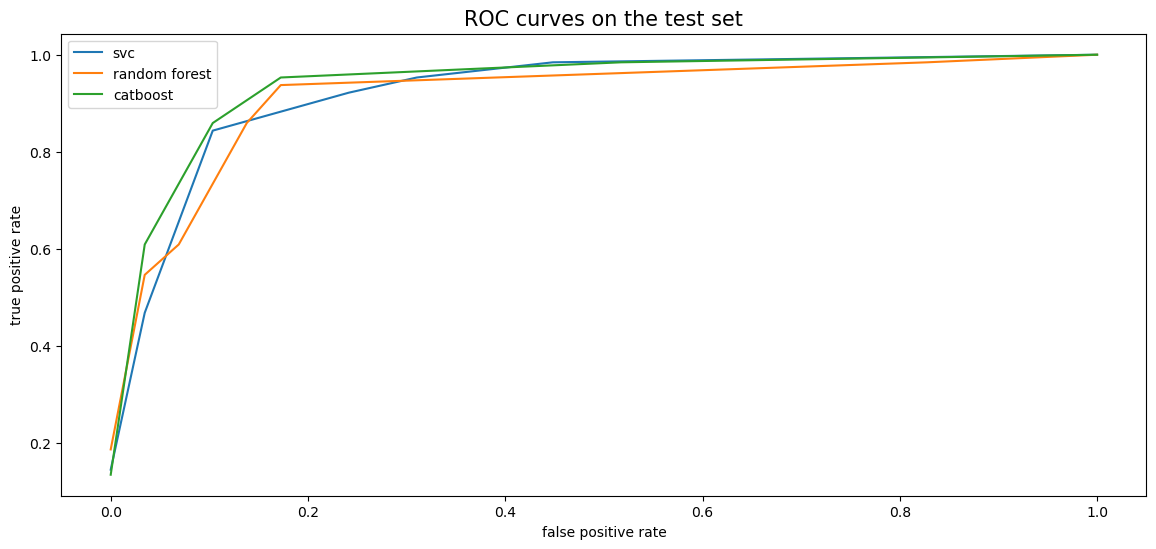

In [98]:
plt.figure(figsize=(14,6))
sns.lineplot(x=fpr_svc, y=tpr_svc, ci=None, label='svc')
sns.lineplot(x=fpr_rf, y=tpr_rf, ci=None, label='random forest')
sns.lineplot(x=fpr_catboost, y=tpr_catboost, ci=None, label='catboost')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curves on the test set', fontsize=15)
plt.legend()
plt.show()

- Lets calculate the aread under curve

In [99]:
roc_auc_svc_test = roc_auc_score(target_test, svc_pred_prob)
roc_auc_svc_test

0.9342672413793103

In [100]:
roc_auc_rf_test = roc_auc_score(target_test, rf_pred_prob)
roc_auc_rf_test

0.9267241379310345

In [101]:
roc_auc_catboost_test = roc_auc_score(y_test, catboost_pred_prob)
roc_auc_catboost_test

0.9504310344827587

SVC and catboost show similar performance. They both outperformed the Random Forest.

In [102]:
results_cv['roc_auc on the test set'] = pd.Series([roc_auc_svc_test, roc_auc_rf_test, roc_auc_catboost_test])

## Final table of results

- Let's have a look at the feature importances of the final model.

In [104]:
final_importance = pd.concat([pd.Series(x_train.columns), 
                              pd.Series(best_catboost.feature_importances_)], axis=1)
final_importance.columns = ['feature', 'importance']
final_importance = final_importance.sort_values(by='importance', ascending=False)
final_importance

,feature,importance
11,thall,23.948810
2,cp,18.593008
16,cat_columns,13.687252
9,slp,10.072239
8,oldpeak,9.522867
10,caa,7.186054
7,exng,5.457989
1,sex,3.183437
6,thalachh,3.038899
12,MHR estimation,1.232489


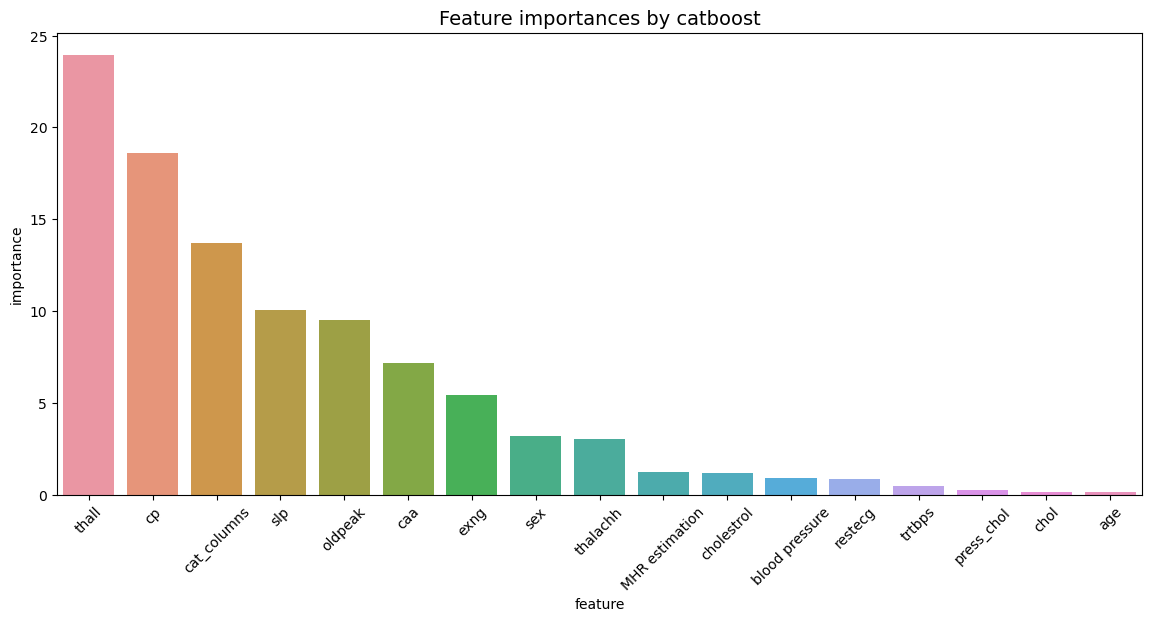

In [105]:
plt.figure(figsize=(14,6))
sns.barplot(data=final_importance, x='feature', y='importance')
plt.xticks(rotation=45)
plt.title('Feature importances by catboost', fontsize=14)
plt.show()

- The most important features are thallium stress test, chest pain type, and number of major vessels.
- The less important features are sex, cholesterol, and resting blood pressure.